In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/kleinbottle/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().kleinbottle4d()

X.shape =  (10000, 4)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=20, max_iter0=40,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2500 points processed...
A_k, Atilde_k: 5000 points processed...
A_k, Atilde_k: 7500 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2500 points processed...
local_param: 5000 points processed...
local_param: 7500 points processed...
local_param: all 10000 points processed...
After iter 1, max distortion is 2.747406
After iter 2, max distortion is 1.879655
After iter 3, max distortion is 1.871621
After iter 4, max distortion is 1.871621
After iter 5, max distortion is 1.871621
After iter 6, max distortion is 1.871621
Max local distortion = 1.8716206046254837
###############
Took 47.4 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views with sz < 2 = 10000
#nodes in views with sz < 2 = 10000
Remaining #nodes in views

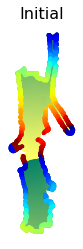

###############
Took 6.5 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.00019902708772167856


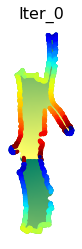

Iteration: 1
error: 0.0002224335382072425
Iteration: 2
error: 0.00023310291838317434
Iteration: 3
error: 0.00024057247350080046
Iteration: 4
error: 0.00023835697557454078
Iteration: 5
error: 0.00023475097785785178


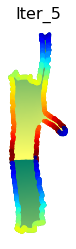

Iteration: 6
error: 0.00023501540245475004
Iteration: 7
error: 0.00023364323154523284
Iteration: 8
error: 0.00023111922245350818
Iteration: 9
error: 0.00022912226908351635
Iteration: 10
error: 0.00022872657533785877


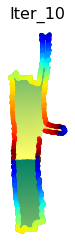

Iteration: 11
error: 0.00022492947942542082
Iteration: 12
error: 0.00022283872750346537
Iteration: 13
error: 0.0002223515460887509
Iteration: 14
error: 0.0002195240417074787
Iteration: 15
error: 0.00021742080220382872


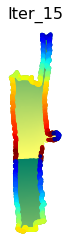

Iteration: 16
error: 0.00021766447381996442
Iteration: 17
error: 0.00021494218262624212
Iteration: 18
error: 0.00021218763386100022
Iteration: 19
error: 0.00020728811644500197
Iteration: 20
error: 0.00020496169053668884


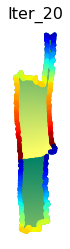

Iteration: 21
error: 0.0002050249260742951
Iteration: 22
error: 0.00020489714879552492
Iteration: 23
error: 0.0002020664430851072
Iteration: 24
error: 0.00019990011522416802
Iteration: 25
error: 0.0001982125253078835


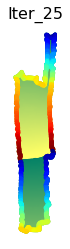

Iteration: 26
error: 0.0001965087690611503
Iteration: 27
error: 0.0001952409279409838
Iteration: 28
error: 0.00019405716750900556
Iteration: 29
error: 0.0001930282833997566
Iteration: 30
error: 0.0001921075035432502


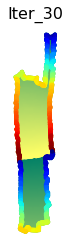

Iteration: 31
error: 0.00019124274715971745
Iteration: 32
error: 0.00019045172682946045
Iteration: 33
error: 0.00018973704734410654
Iteration: 34
error: 0.0001890854257158634
Iteration: 35
error: 0.0001884808770454657


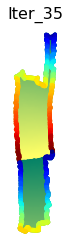

Iteration: 36
error: 0.0001878621582089816
Iteration: 37
error: 0.00018730966205539519
Iteration: 38
error: 0.00018684203501743567
Iteration: 39
error: 0.00018637965794939681


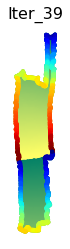

###############
Took 357.9 seconds to refine global embedding.
###############
###############
Took 365.1 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [9]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=25, n_components=2, n_jobs=-1, random_state=42)

In [10]:
y_ltsa = ltsa_obj.fit_transform(X)

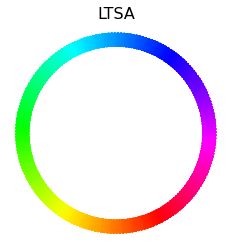

In [11]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'hsv', title='LTSA')

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [13]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.5, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [14]:
y_umap = umap_obj.fit_transform(X)

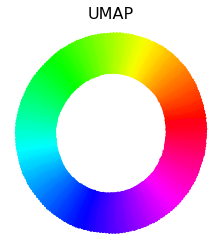

In [15]:
vis.global_embedding(y_umap, labelsMat[:,0], 'hsv', title='UMAP')

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [17]:
tsne_obj = TSNE(perplexity=50, early_exaggeration=6, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [18]:
y_tsne = tsne_obj.fit_transform(X)

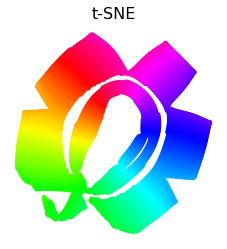

In [19]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'hsv', title='t-SNE')